## Informe Ejecutivo
### Análisis Climático de España

#### **1. Estructura de los Datos**

El dataset contiene registros meteorológicos horarios de varias ciudades españolas:
- Valencia
- Barcelons
- Sevilla
- Bilbao
- Madrid

Cada fila es una medición (ej: "15-ene-2023 14:00: temperatura=12°C, humedad=67%") y cada columna es un tipo de dato (temperatura, lluvia, etc.).


- Total registros: 178.396 mediciones.

- Periodo cubierto: '2015-01-01 00:00:00+01:00' hasta '2018-12-31 23:00:00+01:00'

- Variables clave:

    - temp_c: Temperatura en Celsius (convertida de Kelvin).

    - rain_1h: Lluvia en la última hora (mm).

    - humidity: Humedad relativa (%).

#### **Fig 1. Cobertura Temporal de los Datos**
Muestra si hay huecos en las mediciones.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [10]:
# Set style for visualizations
sns.set(style="whitegrid")
%matplotlib inline

# Load the dataset
df = pd.read_csv('data/weather_features.csv')

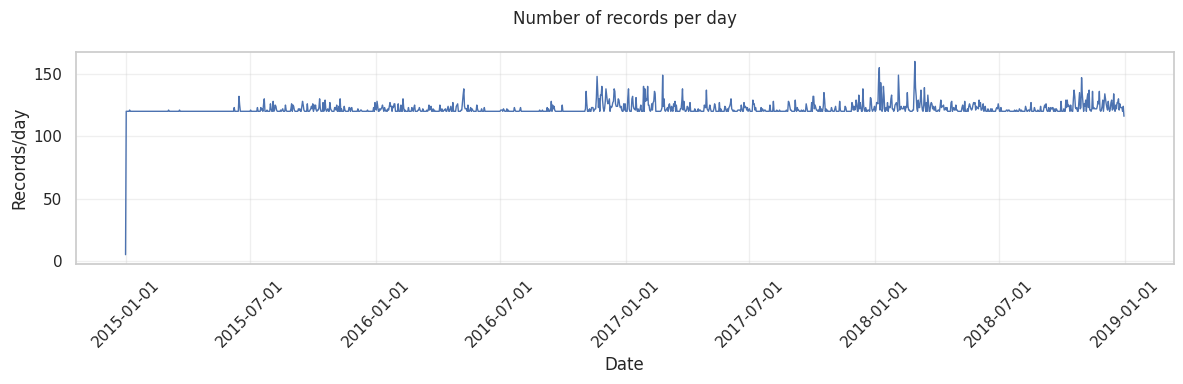

In [11]:
from matplotlib.dates import DateFormatter

plt.figure(figsize=(12, 4))

# Option 1: Use format='ISO8601' for automatic interpretation
#df['dt_iso'] = pd.to_datetime(df['dt_iso'], format='ISO8601')

# Option 2 (if above fails): Use inference with utc=True
df['dt_iso'] = pd.to_datetime(df['dt_iso'], utc=True)

# Extract date only (no time or timezone)
df['date_only'] = df['dt_iso']. dt.tz_localize(None).dt.date

# Count by days
daily_counts = df['date_only'].value_counts().sort_index()

# Plot
ax = daily_counts. plot(linewidth=1)
plt.title("Number of records per day", pad=20)
plt.xlabel("Date")
plt.ylabel("Records/day")
plt.grid(alpha=0.3)

# x-axis format
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d')) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('imgs/day-records.png')
plt.show()

Se observa para el periodo completo de las mediciones que la **línea de datos es estable**, y que no hay caidas.

### **2. Calidad de los Datos**

Verificamos si hay datos corruptos (ej: temperaturas = 0°C, que es imposible en España).

Current temperature statistics (assuming Kelvin):
                temp       temp_min       temp_max
count  178396.000000  178396.000000  178396.000000
mean      289.618605     288.330442     291.091267
std         8.026199       7.955491       8.612454
min       262.240000     262.240000     262.240000
25%       283.670000     282.483602     284.650000
50%       289.150000     288.150000     290.150000
75%       295.150000     293.730125     297.150000
max       315.600000     315.150000     321.150000

Temperature statistics in Celsius:
              temp_c     temp_min_c     temp_max_c
count  178396.000000  178396.000000  178396.000000
mean       16.468605      15.180442      17.941267
std         8.026199       7.955491       8.612454
min       -10.910000     -10.910000     -10.910000
25%        10.520000       9.333602      11.500000
50%        16.000000      15.000000      17.000000
75%        22.000000      20.580125      24.000000
max        42.450000      42.000000      48.000

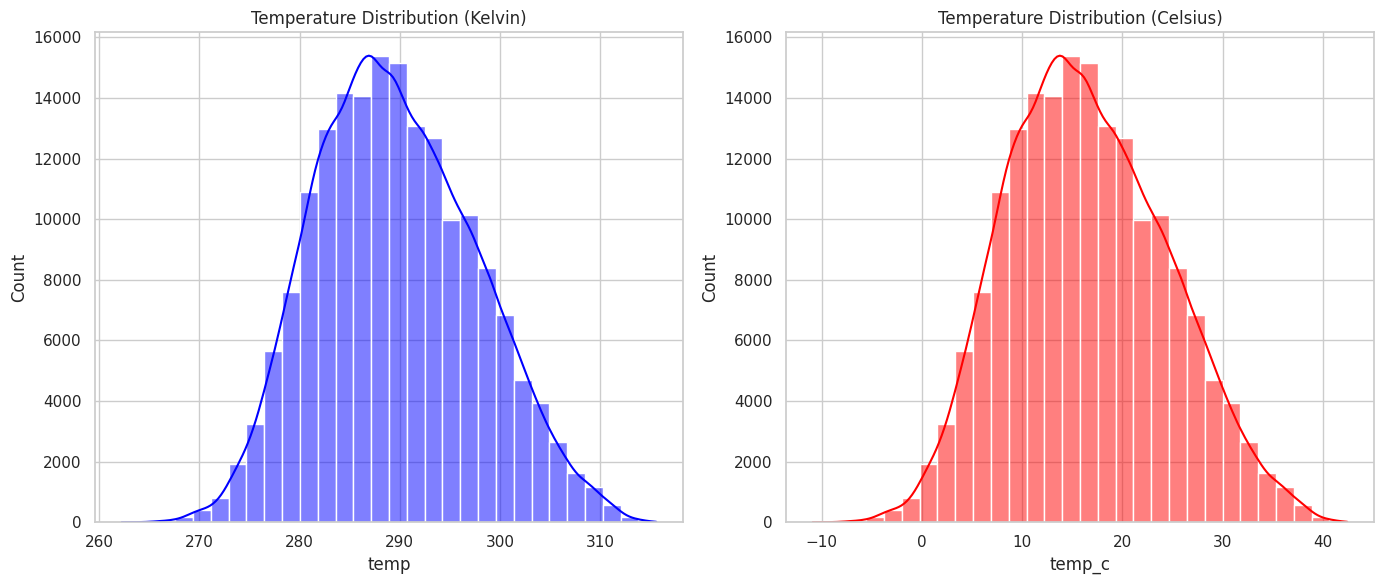


Example temperature conversions:


,dt_iso,temp,temp_c
167209,2017-09-30 20:00:00+00:00,300.150,27.000
22887,2017-08-09 04:00:00+00:00,298.150,25.000
157554,2016-08-30 20:00:00+00:00,301.790,28.640
142937,2015-01-05 01:00:00+00:00,275.528,2.378
20210,2017-04-19 23:00:00+00:00,287.150,14.000


In [12]:
# First, let's check the current temperature range to confirm the unit
print("Current temperature statistics (assuming Kelvin):")
print(df[['temp', 'temp_min', 'temp_max']].describe())

# Function to convert Kelvin to Celsius
def kelvin_to_celsius(k):
    return k - 273.15

# Function to convert Fahrenheit to Celsius (just in case)
def fahrenheit_to_celsius(f):
    return (f - 32) * 5/9

# Create new columns with Celsius temperatures
df['temp_c'] = kelvin_to_celsius(df['temp'])
df['temp_min_c'] = kelvin_to_celsius(df['temp_min'])
df['temp_max_c'] = kelvin_to_celsius(df['temp_max'])

# Verify the conversion
print("\nTemperature statistics in Celsius:")
print(df[['temp_c', 'temp_min_c', 'temp_max_c']].describe())

# Plot the converted temperatures
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['temp'], bins=30, color='blue', label='Kelvin', kde=True)
plt.title('Temperature Distribution (Kelvin)')

plt.subplot(1, 2, 2)
sns.histplot(df['temp_c'], bins=30, color='red', label='Celsius', kde=True)
plt.title('Temperature Distribution (Celsius)')
plt.tight_layout()
plt.show()

# Show some example conversions
print("\nExample temperature conversions:")
sample = df.sample(5)[['dt_iso', 'temp', 'temp_c']]
display(sample)

Valores nulos: 0 valores **nulos** en todas las columnas.

Ceros inválidos:
- 0 registros con temperatura=0K (-273°C → ERROR).
- 63 registros con humedad=0% (posibles errores).

In [13]:
print((df['temp'] == 0).sum())
print((df['humidity'] == 0).sum())

0
63
